# Clustering con K-Means

## Importando las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Solo aplica para G Collab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Importar el Dataset

In [2]:
dataset = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Machine Learning/Mall_Customers.csv')
# dataset = pd.read_csv('Mall_Customers.csv')
# construir una matriz que contenga las columnas que nos interesan para crear el clustering
# ingreso anual  y puntuación de gasto
X = dataset.iloc[:, [3, 4]].values

In [9]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Usando el método del codo para encontrar el número óptimo de grupos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

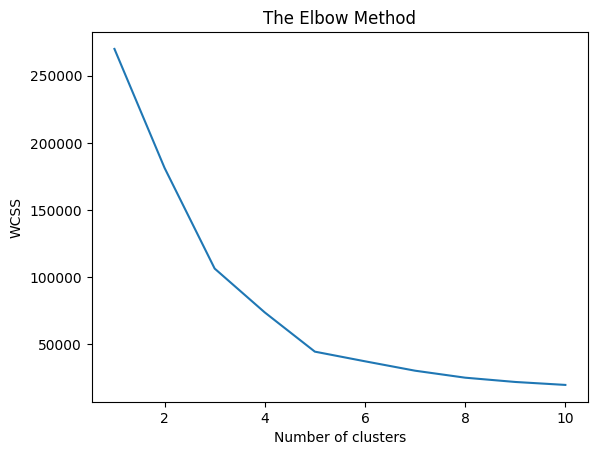

In [6]:
# Hay que elegir la cantidad de clusters que queremos ejecutar
# Utilizaremos el método del codo para averiguar el número óptimo de clusters
# Tenemos la función de KMeans de ScikitLearn
# Como no sabemos en cuántos segmentos dividirlos, vamos a crear un mínimo y un máximo
# Por ejemplo, vamos a ejecutar el algoritmo diez veces, calcular 10 k-means
# Calcularemos la suma de los cuadrados de cada clúster y visualizamos en un gráfico
from sklearn.cluster import KMeans
wcss = []
# Primero, habrá que ejecutar el algoritmo de K-Means para ajustarse a crear esos clusters
# Una vez calculados los clusters, los segmentos, habrá que calcular la suma
# de los cuadrados de cada uno de los grupos para añadirlo a nuestra lista, a nuestro array WCSS
for i in range(1, 11):
    # primer parametro numero de clusters
    # iteramos para cada uno de nuestros clusters i
    # segundo parámetro, le decimos que trabaje con k-means++ para evitar el tema de
    # la inicialización no aleatoria
    # ¿Podría ser que el algoritmo nunca acabara realmente?
    # Si, podría ser que no acabara, que siempre se estuviera moviendo el centro de un lado para otro
    # Un parámetro que se recomienda colocar es el número máximo de iteraciones, default es 300
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 0)
    # Ahora lo único que tiene que hacer es ajustar nuestra matriz de características X
    kmeans.fit(X)
    # Y ahora lo único que tengo que hacer es una vez que he ajustado esa matriz de características, es
    # calcular la suma de los cuadrados de las distancias de cada punto al centro del cluster
    # Y para calcular la suma de los cuadrados, lo único que habrá que hacer es indicar que a la raíz wcss,
    # le añadamos .append para añadir al final de k-means el parámetro inercia
    # es el parámetro que me trae la suma de los cuadrados de las distancias
    wcss.append(kmeans.inertia_)
    # No hay que programarlos, no hay que calcular distancias
    # Lo hace automáticamente por nosotros
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Con este método, identificamos que requerimos de 5 clusters!

## Entrenando el modelo K-Means en el conjunto de datos

In [11]:
# Realizamos lo mismo que ya habíamos hecho, solo ajustamos el número de clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, random_state = 0)
# Lo que nos interesa es saber qué características o qué regiones quedan perfectamente delimitando
# cada uno de los tipos de usuario que salen
# Nuestro objeto k-means ajuste los datos de X, pero también que nos mande la predicción
# de a qué cluster pertenece cada punto
# ajuste y prediga
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## Visualising the clusters

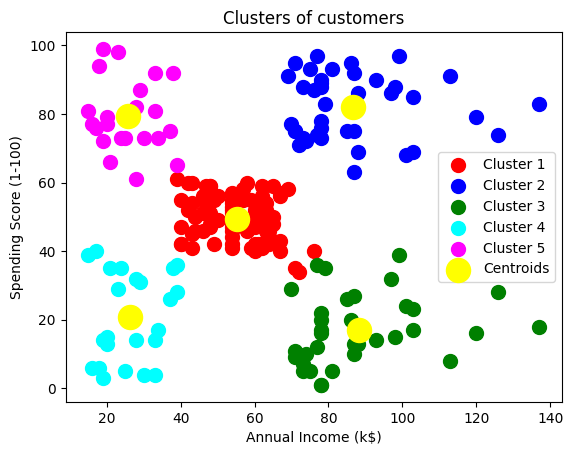

In [13]:
# Finalmente, dichos datos hay que graficarlos!
# Los dividimos en 5 clusters originales
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# pintamos nuestros centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()